In [2]:
%matplotlib inline
import nibabel as nib
from nilearn import image as nimg
from nilearn import plotting as nplot
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:

fig_dir = 'D:\\Mirror\\dataset\\dilemma\\derivatives\\work\\manuscript\\figures_2023-04-06'
bids_dir = 'D:\\Mirror\\dataset\\dilemma'
behav_dir = os.path.join(bids_dir, 'derivatives', 'behav')
os.chdir(fig_dir)

In [5]:
# set figure style
sns.set(style='white', font='Arial')
sns.set_context('paper')

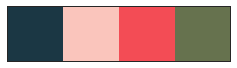

In [6]:
colors = ['#1B3744', '#FAC5BC', '#F34C55', '#66724E']
sns.set_palette(colors)
sns.palplot(colors)

In [7]:
df_all = pd.read_excel(os.path.join(behav_dir,'all_data_2023-01-13.xlsx'),
                       sheet_name='all_data_2023-01-13')#.drop('Unnamed: 0', axis=1)

## Figure 1

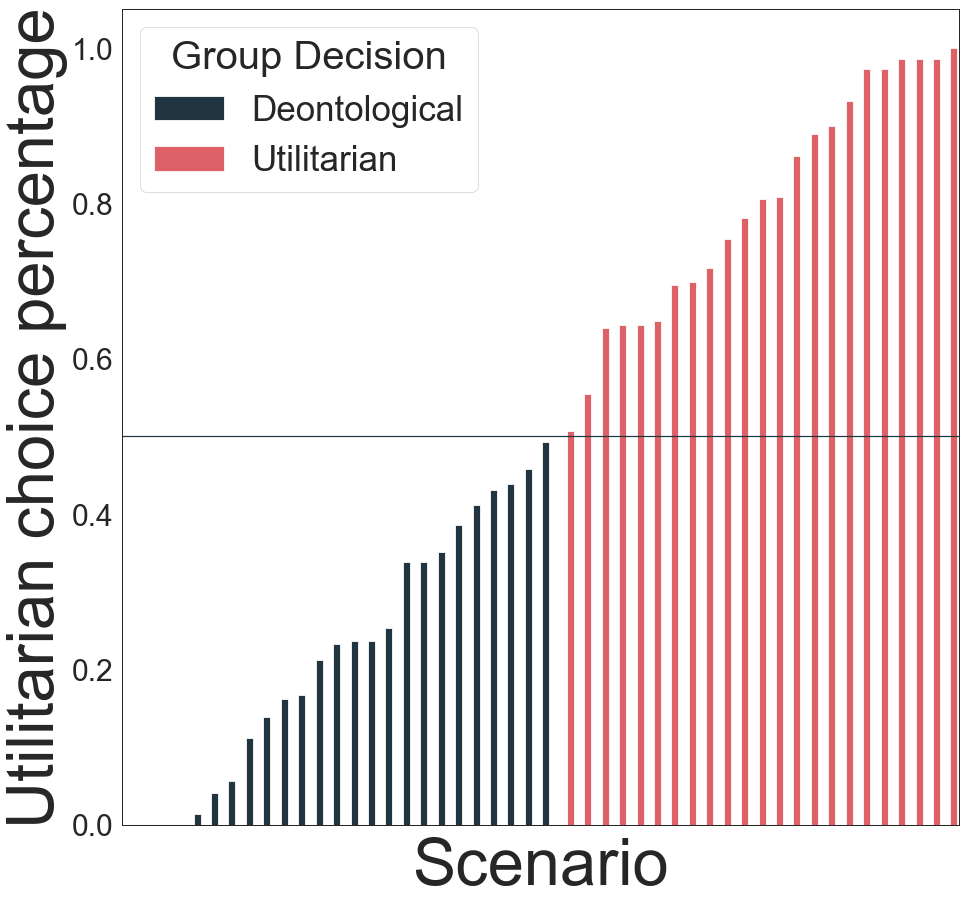

In [23]:
# 1A
df_summary = pd.read_excel(os.path.join(behav_dir,'ver1','summary_2022-05-02.xlsx'),
                           sheet_name='group_summary_n74_transposed').sort_values(by='avg_decision')
df_summary['bin_group_decision'] = np.where(df_summary['avg_decision'] > .5, 1, 0)
colors = ['#1B3744','#F34C55']
sns.set_palette(colors)

fig, ax = plt.subplots(figsize=(15, 15))

ax= sns.barplot(data=df_summary, y='avg_decision', x='scenario_num', hue='bin_group_decision')

ax.set_xlabel('Scenario', fontsize = 65)
ax.set_xticklabels([])
ax.set_ylabel('Utilitarian choice percentage', fontsize = 65)
ax.tick_params(axis='y', labelsize=30)

ax.legend(fontsize=35)
ax.legend_.set_title('Group Decision')
new_labels=[ 'Deontological','Utilitarian']

for t, l in zip(ax.legend_.texts, new_labels):
    t.set_text(l)

plt.setp(ax.get_legend().get_title(), fontsize=40)
plt.axhline(y=.5, linestyle='-')

plt.savefig(os.path.join(fig_dir,'Fig1A_scenarios_utilitarian_ratio.png'), bbox_inches='tight')

In [9]:
# 1B
df_12 = df_all[(df_all['dataset']==1)|(df_all['dataset']==2)]

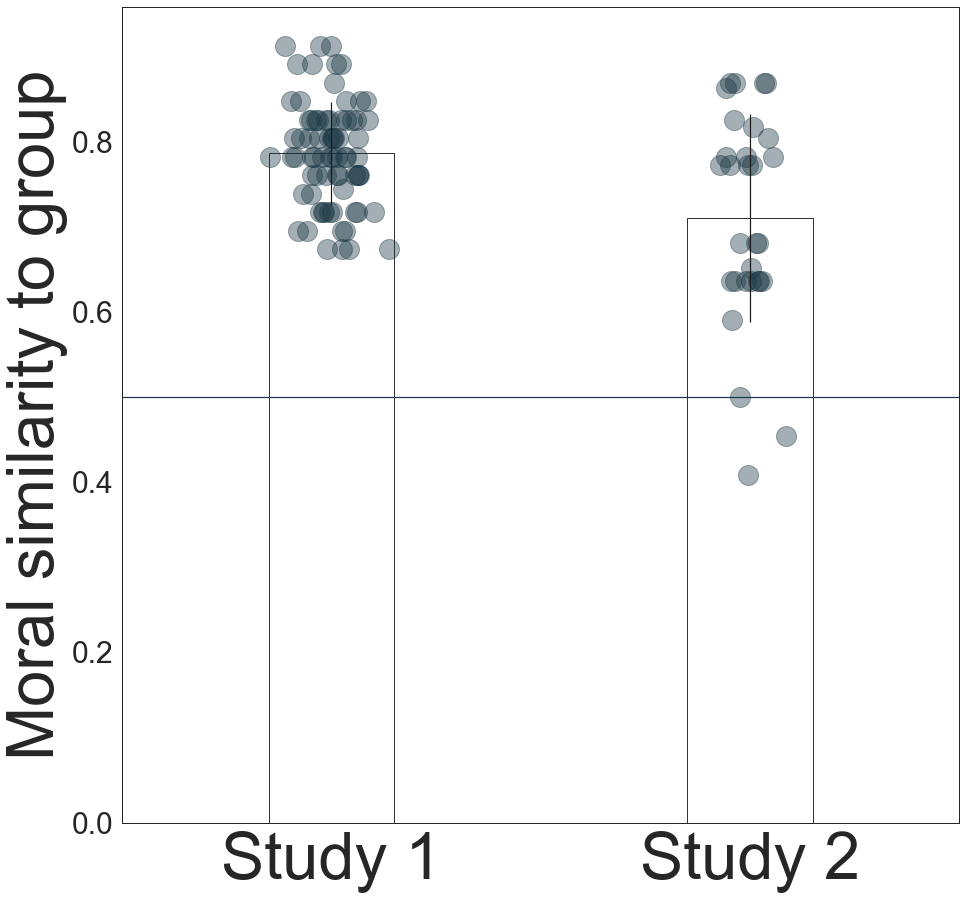

In [16]:

colors = ['#1B3744', '#1B3744']
sns.set_palette(colors)
df = df_12[['mdt_bin_agree_ratio','dataset']]

fig, ax = plt.subplots(figsize = (15,15))
jitter = .05

for num, vernum in enumerate(df['dataset'].unique()):
    # for each version
    colName = 'mdt_bin_agree_ratio'
    df_tmp = df[df['dataset']==vernum]
    df_tmp_jitter = pd.DataFrame(np.random.normal(loc = 0, scale=jitter, size = df_tmp.values.shape), columns = df_tmp.columns)
    df_tmp_jitter += num
    ax.bar(num, height=np.mean(df_tmp[colName]),
           yerr = np.std(df_tmp[colName]),
           color = (0,0,0,0),
           edgecolor = '0',
           width = .3)
    ax.plot(df_tmp_jitter[colName], df_tmp[colName], 'o', alpha = .4, zorder=1, ms=20, mew=1)

ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(['Study 1', 'Study 2'], fontsize=65)
ax.set_ylabel('Moral similarity to group', fontsize=65)
ax.set_xlim(-0.5,len(df.columns)-0.5)
ax.tick_params(axis='y', labelsize=30)
plt.axhline(y=.5, linestyle='-')

plt.savefig(os.path.join(fig_dir,'Fig1B_agree_ratio.png'), bbox_inches='tight')

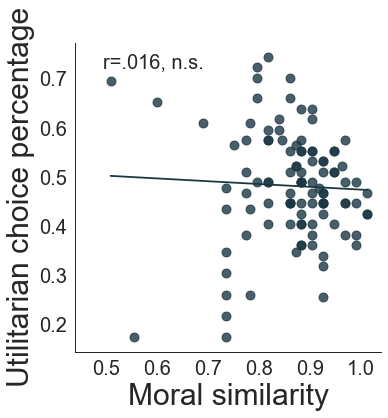

In [7]:
# 1C
colors = ['#1B3744']
sns.set_palette(colors)

df = df_all
a = sns.lmplot(data=df, y = 'mdt_avg_util', x = 'mdt_bin_agree_ratio',
               ci=None, scatter_kws={"s":80})
a.set_xlabels('Moral similarity', fontsize=30)
a.set_ylabels('Utilitarian choice percentage', fontsize=30)
a.set_yticklabels(size=20)
a.set_xticklabels(size=20)

axis = a.axes[0,0]
axis.set_xlim(0.34, 0.94)

fig=a.fig
fig.text(.20, .9, 'r=.016, n.s.', fontsize=20)

a.savefig(os.path.join(fig_dir, 'Fig1C_moral_intuition_utilitarian.png'))

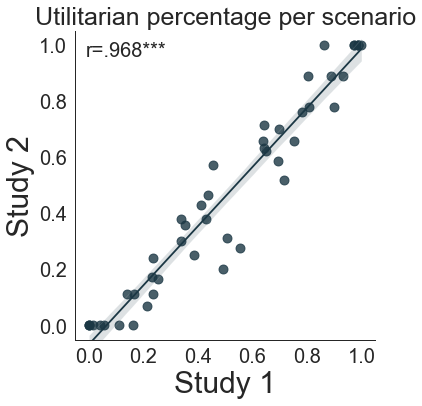

In [21]:
# 1D
ver1_data_file = 'D:\\Mirror\\dataset\\dilemma\\derivatives\\behav\\ver1\\summary_2022-05-02.xlsx'
ver2_data_file = 'D:\\Mirror\\dataset\\dilemma\\derivatives\\behav\\ver2\\summary_n30_2022-08-02.xlsx'

ver1_df = pd.read_excel(ver1_data_file, sheet_name='group_summary_n74_transposed')
ver2_df = pd.read_excel(ver2_data_file, sheet_name='group_summary_transposed')

colors = ['#1B3744', '#1B3744']
sns.set_palette(colors)

dfs = {'ver1':ver1_df,
       'ver2':ver2_df}

for df_key in dfs.keys():
    colNames = dfs[df_key].columns.drop('scenario_num')
    newColNames = [df_key+'_'+col for col in colNames]
    tmp_dict=dict()
    for col in colNames:
        tmp_dict[col] = df_key+'_'+col

    # print(tmp_dict)
    dfs[df_key].rename(columns=tmp_dict, inplace=True)

all_dfs = [ver1_df, ver2_df]

from functools import reduce
df_merged = reduce(lambda left,right: pd.merge(left, right, on='scenario_num',how='outer'), all_dfs)
select_cols = [col for col in df_merged.columns if col.endswith('avg_decision')]
df_select = df_merged[select_cols]

# compare two average decisions
a = sns.lmplot(data=df_select, x = df_select.columns[0], y = df_select.columns[1],
               scatter_kws={"s":80})
a.set_xlabels('Study 1',fontsize=30)
a.set_ylabels('Study 2',fontsize=30)


axis = a.axes[0,0]
axis.set_xlim(-0.05, 1.05)
axis.set_ylim(-.05, 1.05)
axis.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.])

axis.set_yticklabels(axis.get_yticklabels(),size=20)
axis.set_xticklabels(axis.get_xticklabels(),size=20)

ax = plt.gca()
ax.set_title('Utilitarian percentage per scenario', fontsize = 25)
fig=a.fig
fig.text(.15, .9, 'r=.968***', fontsize=20)

# a.savefig(os.path.join(fig_dir,'Fig1D_compare_studies12.png'))

## Figure 2

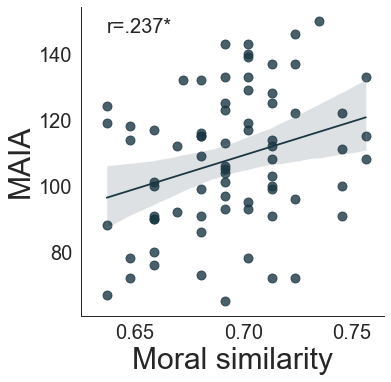

In [13]:
# 2A

a.savefig(os.path.join(fig_dir, 'compare_studies12.png'))
df = df_12[['mdt_bin_agree_ratio', 'mdt_distance2_sqrt', 'dataset', 'maia_total']]
a = sns.lmplot(data=df[df['version'] == 1], x=df.columns[0], y=df.columns[3], scatter_kws={"s":80})
a.set_xlabels('Moral similarity', fontsize=30)
a.set_ylabels('MAIA', fontsize=30)

axis = a.axes[0,0]
axis.set_xlim(0.65, 0.93)
axis.set_xticks([ 0.7, 0.8,  0.9])
axis.set_yticklabels(axis.get_yticklabels(),size=20)
axis.set_xticklabels(axis.get_xticklabels(),size=20)

fig = a.fig
# fig.suptitle('Interoceptive awareness')
fig.text(.2, .9, 'r=.237*', fontsize = 20)

a.savefig(os.path.join(fig_dir, 'Fig2A_Study1_moral_similarity_MAIA.png'))

In [ ]:
# 2B

a.savefig(os.path.join(fig_dir, 'compare_studies12.png'))
df = df_12[['mdt_bin_agree_ratio', 'MoDis', 'version', 'maia_total']]
a = sns.lmplot(data=df[df['version'] == 1], x=df.columns[1], y=df.columns[3], scatter_kws={"s":80})
a.set_xlabels('Moral distance from group', fontsize=30)
a.set_ylabels('MAIA', fontsize=30)

axis = a.axes[0,0]
axis.set_xlim(0.22, 0.35)
axis.set_xticks([ 0.24, 0.28,  0.32])
axis.set_yticklabels(axis.get_yticklabels(),size=20)
axis.set_xticklabels(axis.get_xticklabels(),size=20)

fig = a.fig
# fig.suptitle('Interoceptive awareness')
fig.text(.2, .85, 'r = -.240*', fontsize=20)

a.savefig(os.path.join(fig_dir, 'Fig2B_Study1_moral_distance_MAIA.png'))

## Figure3

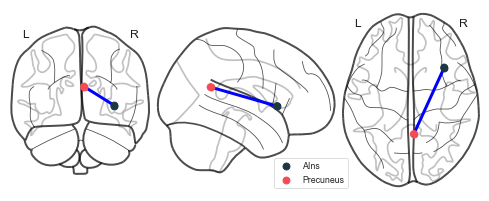

In [7]:
## draw connecoctome - insula - precuneus only
connection =np.array([(1, -0.5) ,(-0.5, 1, )])
coords = np.array([(36, 18, 0),(4, -52, 20)])
node_color=['#1B3744','#F34C55']
display = nplot.plot_connectome(adjacency_matrix=connection,
                      node_coords= coords,
                      edge_threshold='80%',
                                node_color = node_color)



labels = ['AIns','Precuneus']
# labels should be the names of each node
for i in range(len(coords[0:2])):
     display.add_markers(marker_coords=[coords[i]], marker_color=node_color[i], marker_size=50,
     label=labels[i])
plt.legend(loc='center', bbox_to_anchor = (-0.2,.1))
plt.savefig(os.path.join(fig_dir,'Fig3A_connectome_mdt_distance_sqrt2_Ins.png'))

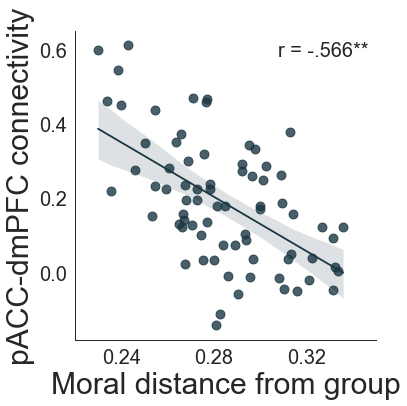

In [20]:
# 3B
## draw corr plot
colors=['#1B3744']
sns.set_palette(colors)
datDir = 'D:\\Mirror\\dataset\\dilemma\\derivatives\\work\\figures'
df = pd.read_excel(os.path.join(datDir,'behav_data.xlsx'),sheet_name='connectivity_3')
corrplot=sns.lmplot(data=df, y='pACC_SFG_conn', x ='mdt_distance2_sqrt', scatter_kws={"s":80})
corrplot.set_xlabels('Moral distance from group', fontsize=30)
corrplot.set_ylabels('pACC-dmPFC connectivity', fontsize=30)

axis = corrplot.axes[0,0]
axis.set_xlim(0.22, 0.35)
axis.set_xticks([ 0.24, 0.28,  0.32])
axis.set_yticks([0.0,0.2,0.4,0.6])
axis.set_yticklabels([0.0,0.2,0.4,0.6],size=20)
axis.set_xticklabels([ 0.24, 0.28,  0.32],size=20)

fig = corrplot.fig
fig.text(.7, .9, 'r = -.566**', fontsize=20)
corrplot.savefig(os.path.join(fig_dir,'Fig3B_corr_pACC-DMPFC_moral_distance.png'))

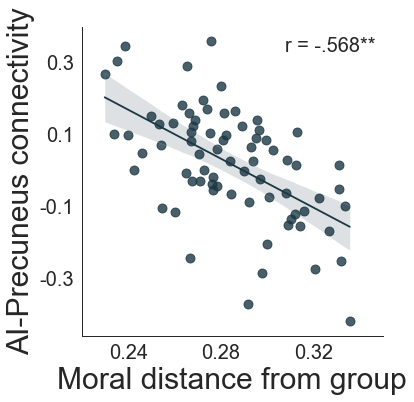

In [8]:
# 3C
## draw corr plot
datDir = 'D:\\Mirror\\dataset\\dilemma\\derivatives\\work\\figures'
colors=['#1B3744']
sns.set_palette(colors)
df = pd.read_excel(os.path.join(datDir,'behav_data.xlsx'),sheet_name='connectivity_1')
corrplot=sns.lmplot(data=df, y='ins_prec_connectivity', x ='mdt_distance2_sqrt', scatter_kws={"s":80})
corrplot.set_xlabels('Moral distance from group', fontsize=30)
corrplot.set_ylabels('AI-Precuneus connectivity', fontsize=30)

axis = corrplot.axes[0,0]
axis.set_xlim(0.22, 0.35)
axis.set_xticks([ 0.24, 0.28,  0.32])
axis.set_yticks([-.3, -.1, .1, .3])
axis.set_yticklabels([-.3, -.1, .1, .3],size=20)
axis.set_xticklabels([ 0.24, 0.28,  0.32],size=20)

fig = corrplot.fig
fig.text(.7, .9, 'r = -.568**', fontsize=20)
corrplot.savefig(os.path.join(fig_dir,'Fig3C_corr_AI-precuneus_moral_distance.png'))

## Fig4

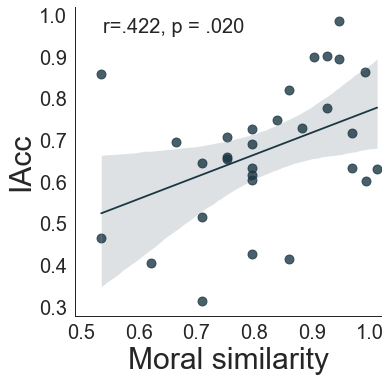

In [13]:
# 4A
df = df_12[['mdt_bin_agree_ratio', 'mdt_distance2_sqrt', 'version','int_acc']]
a = sns.lmplot(data=df[df['version'] == 2], x=df.columns[0], y=df.columns[3], scatter_kws={"s":80})
a.set_xlabels('Moral similarity', fontsize=30)
a.set_ylabels('IAcc', fontsize=30)

axis = a.axes[0,0]
axis.set_xlim(0.39, 0.92)

axis.set_yticklabels(axis.get_yticklabels(),size=20)
axis.set_xticklabels(axis.get_xticklabels(),size=20)

fig = a.fig
fig.text(.2, .9, 'r=.422, p = .020', fontsize = 20)

a.savefig(os.path.join(fig_dir, 'Fig4A_Study2_intAcc_moralSimilarity.png'))

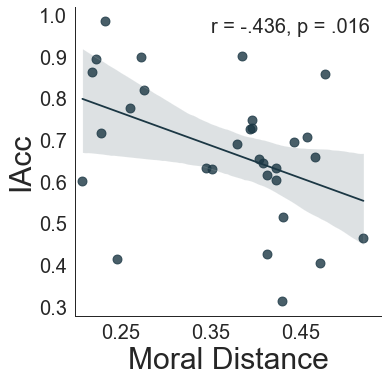

In [18]:
#4B
df = df_12[['mdt_bin_agree_ratio', 'mdt_distance2_sqrt', 'version','int_acc']]
a = sns.lmplot(data=df[df['version'] == 2], x=df.columns[1], y=df.columns[3], scatter_kws={"s":80})
a.set_xlabels('Moral Distance', fontsize=30)
a.set_ylabels('IAcc', fontsize=30)


axis = a.axes[0,0]
axis.set_xlim(0.2, 0.54)
axis.set_xticks([ 0.25, 0.35,  0.45])
axis.set_yticklabels(axis.get_yticklabels(),size=20)
axis.set_xticklabels([ 0.25, 0.35,  0.45],size=20)

fig = a.fig
fig.text(.5, .9, 'r = -.436, p = .016', fontsize=20)

a.savefig(os.path.join(fig_dir, 'Fig4B_Study2_intAcc_moralDistance.png'))

## Fig5

In [25]:
df = df_12[['mdt_bin_agree_ratio', 'mdt_distance2_sqrt' ,'version','teq', 'int_acc']]

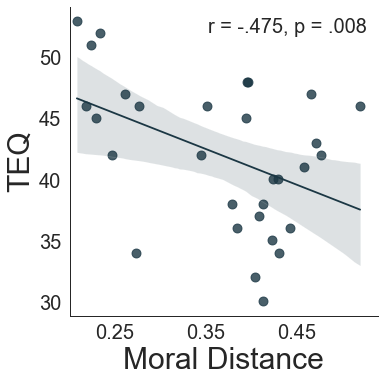

In [30]:
a = sns.lmplot(data=df[df['version'] == 2], x=df.columns[1], y=df.columns[3], scatter_kws={"s":80})
a.set_xlabels('Moral Distance', fontsize=30)
a.set_ylabels('TEQ', fontsize=30)


axis = a.axes[0,0]
axis.set_xlim(0.2, 0.54)
axis.set_xticks([ 0.25, 0.35,  0.45])
axis.set_yticklabels(axis.get_yticklabels(),size=20)
axis.set_xticklabels([ 0.25, 0.35,  0.45],size=20)

fig = a.fig
fig.text(.5, .9, 'r = -.475, p = .008', fontsize=20)

a.savefig(os.path.join(fig_dir, 'Fig5_teq_distance.png'))

In [37]:
df = df_all[['mdt_MP_bin_agree_ratio', 'mdt_MP_distance2_sqrt' , 'int_acc', 'dataset']]

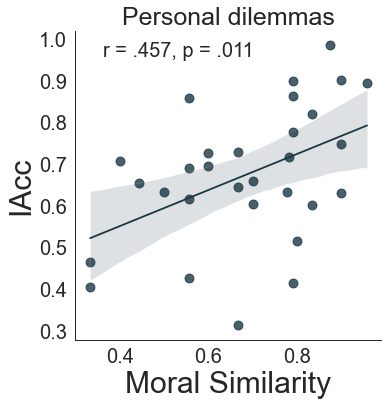

In [45]:
a = sns.lmplot(data=df[df['dataset'] == 2], x=df.columns[0], y=df.columns[2], scatter_kws={"s":80})
a.set_xlabels('Moral Similarity', fontsize=30)
a.set_ylabels('IAcc', fontsize=30)


axis = a.axes[0,0]
axis.set_xlim(0.3, 0.99)
axis.set_xticks([ 0.4, .6, .8])
axis.set_yticklabels(axis.get_yticklabels(),size=20)
axis.set_xticklabels([ 0.4, .6, .8],size=20)

ax = plt.gca()
ax.set_title('Personal dilemmas', fontsize = 25)

fig = a.fig
fig.text(.2, .9, 'r = .457, p = .011', fontsize=20)

a.savefig(os.path.join(fig_dir, 'Fig4C_IACC_similarity_MP.png'))

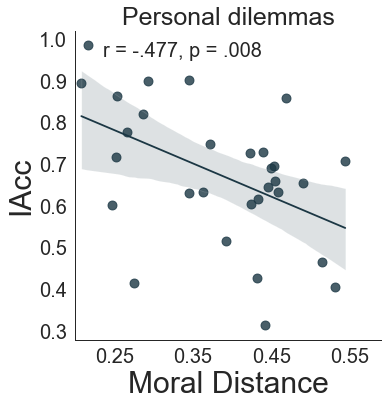

In [50]:
a = sns.lmplot(data=df[df['dataset'] == 2], x=df.columns[1], y=df.columns[2], scatter_kws={"s":80})
a.set_xlabels('Moral Distance', fontsize=30)
a.set_ylabels('IAcc', fontsize=30)


axis = a.axes[0,0]
axis.set_xlim(0.2, 0.59)
axis.set_xticks([ .25, .35, .45, .55])
axis.set_yticklabels(axis.get_yticklabels(),size=20)
axis.set_xticklabels([ .25, .35, .45, .55],size=20)

ax = plt.gca()
ax.set_title('Personal dilemmas', fontsize = 25)

fig = a.fig
fig.text(.2, .9, 'r = -.477, p = .008', fontsize=20)

a.savefig(os.path.join(fig_dir, 'Fig4D_IACC_distance_MP.png'))

# DMN cluster analsyis

In [9]:
datfile = 'D:\\Mirror\\dataset\\dilemma\\derivatives\\conn\\conn_n74\\results\\secondlevel\\SBC_01\\AllSubjects(0).age(0).gender_bin(0).mdt_D2SQRT(1)\\rest\\0168_INS_dIa_R.nii\\DMN_all_clusters.xlsx'
dmn_dat = pd.read_excel(datfile)
print(dmn_dat.columns)

Index(['Precuneus', 'MPFC', 'rTPJ', 'lTPJ'], dtype='object')


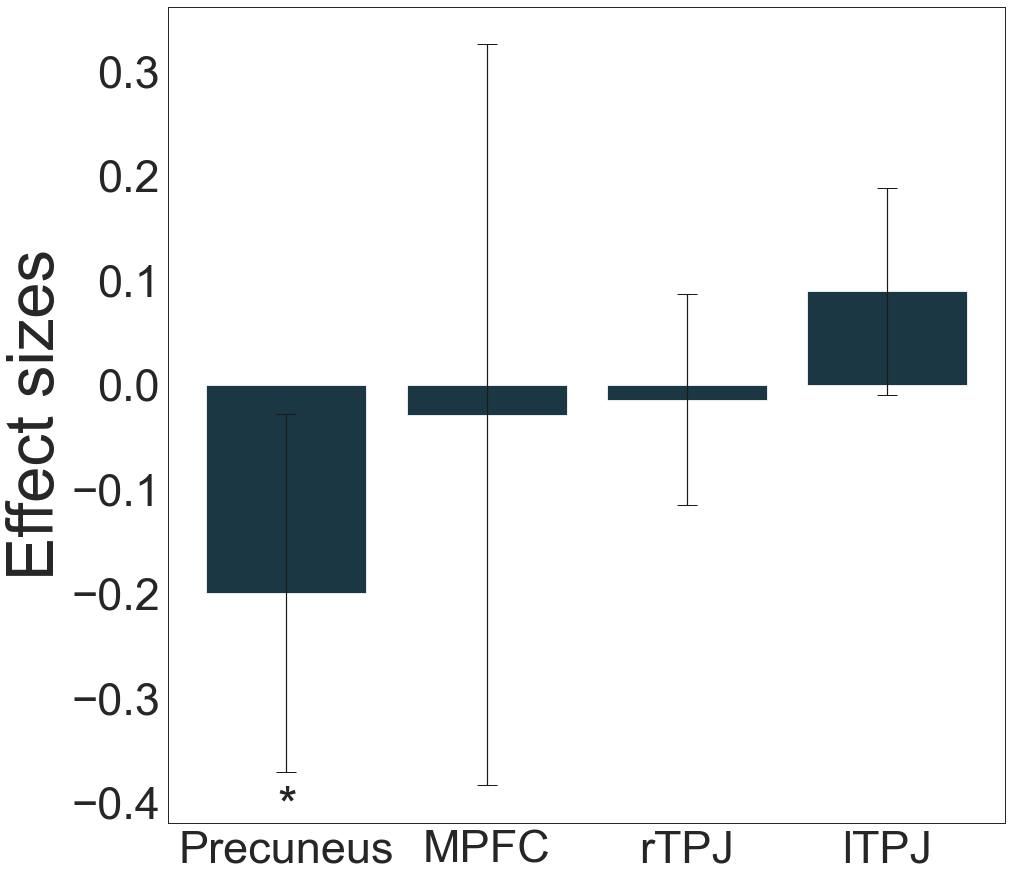

In [17]:
colors = ['#1B3744', '#1B3744','#1B3744', '#1B3744']
betas=[-0.199610111930582,-0.028955129996165,-0.014360215099876,0.089048006843129]
ci= [0.171139904808580,0.354565086075629,0.100844381694216,0.098601908316741] # 95% ci

fig, ax = plt.subplots(figsize=(15, 15))

ax.bar(dmn_dat.columns, betas, yerr=ci, capsize=10,
        color=colors[0])

ax.set_ylabel('Effect sizes', fontsize = 65)
ax.tick_params( labelsize=45)

fig.text(.226, .125, '*', fontsize=50)

plt.show()
fig.savefig(os.path.join(fig_dir,'DMN_roianalysis.png'), bbox_inches='tight')